# Customer Segmentation with K-Nearest Neighbors (KNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Load the dataset
data=pd.read_csv('customer_segment.csv')
data.head()

,Customer ID,Gender,Work Experience,Annual Income($),Spending
0,458989,Female,0,20,0
1,458994,Male,8,20,1
2,458996,Female,0,20,0
3,459000,Male,11,20,2
4,459001,Female,12,21,0


In [ ]:
data=pd.read_csv('customer_segment.csv')
data.head()  

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,Customer ID,Gender,Work Experience,Annual Income($),Spending
0,458989,0,0,20,0
1,458994,1,8,20,1
2,458996,0,0,20,0
3,459000,1,11,20,2
4,459001,0,12,21,0


In [10]:
x=data.iloc[:,:-1]
x.head(3)

,Customer ID,Gender,Work Experience,Annual Income($)
0,458989,0,0,20
1,458994,1,8,20
2,458996,0,0,20


In [11]:
y=data.iloc[:,-1:]
y.head(3)


,Spending
0,0
1,1
2,0


In [12]:
data.isna().sum()

Customer ID         0
Gender              0
Work Experience     0
Annual Income($)    0
Spending            0
dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [14]:
sc_x.shape

(220, 4)

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Annual Income($)'}>],
       [<Axes: title={'center': 'Spending  '}>, <Axes: >]], dtype=object)

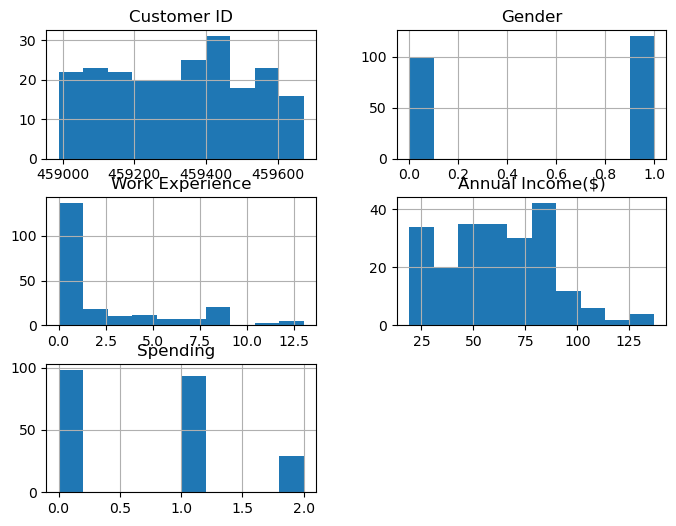

In [28]:
data.hist(figsize=(8,6))

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=0.2,random_state=42)
print('Training Data Shape')
print()
print('Training data-X- shape:\t',xtrain.shape)
print()
print('Training data-Y- shape:\t',ytrain.shape)
print('Testing Data Shape')
print()
print('Testing data(X-Input) shape:\t',xtest.shape)
print()
print('Testing data(Y-Input) shape:\t',ytest.shape)

Training Data Shape

Training data-X- shape:	 (176, 4)

Training data-Y- shape:	 (176, 1)
Testing Data Shape

Testing data(X-Input) shape:	 (44, 4)

Testing data(Y-Input) shape:	 (44, 1)


In [24]:
knn_model=KNeighborsClassifier(n_neighbors=3)
print('***KNN Classifier Model********')
print('Training Phase\n')
knn_model. fit (xtrain, ytrain)
print('Training is completed')
print('='*100)
print()
print('Testing Phase\n')
ypred=knn_model.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('='*100)

***KNN Classifier Model********
Training Phase

Training is completed

Testing Phase

Predicted Class Labels are: 
 [0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 2 0 1 0 1 0]
Test is also done



C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [25]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.3181818181818182

Confusion Matrix:
 [[ 9  7  1]
 [13  5  0]
 [ 6  3  0]]

Classification report :
               precision    recall  f1-score   support

           0       0.32      0.53      0.40        17
           1       0.33      0.28      0.30        18
           2       0.00      0.00      0.00         9

    accuracy                           0.32        44
   macro avg       0.22      0.27      0.23        44
weighted avg       0.26      0.32      0.28        44



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5, 7, 9]
results = {}

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(xtrain, ytrain)
    y_pred = knn_model.predict(xtest)
    print(f"Predicted Class Labels for K-value {k}: {ypred}")
    print()
    accuracy = accuracy_score(ytest, y_pred)
    results[k] = accuracy

for k, accuracy in results.items():
    print(f"K={k}: Accuracy = {accuracy}")

Predicted Class Labels for K-value 3: [0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 2 0 1 0 1 0]

Predicted Class Labels for K-value 5: [0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 2 0 1 0 1 0]

Predicted Class Labels for K-value 7: [0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 2 0 1 0 1 0]

Predicted Class Labels for K-value 9: [0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 2 0 1 0 1 0]

K=3: Accuracy = 0.3181818181818182
K=5: Accuracy = 0.4090909090909091
K=7: Accuracy = 0.36363636363636365
K=9: Accuracy = 0.45454545454545453


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

# Medical Diagnosis with Naive Bayes

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Load the dataset
data=pd.read_csv('processed-data.csv')
data.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


array([[<Axes: title={'center': 'Tiredness'}>,
        <Axes: title={'center': 'Dry-Cough'}>,
        <Axes: title={'center': 'Difficulty-in-Breathing'}>,
        <Axes: title={'center': 'Sore-Throat'}>],
       [<Axes: title={'center': 'None_Sympton'}>,
        <Axes: title={'center': 'Pains'}>,
        <Axes: title={'center': 'Nasal-Congestion'}>,
        <Axes: title={'center': 'Runny-Nose'}>],
       [<Axes: title={'center': 'None_Experiencing'}>,
        <Axes: title={'center': 'Age_0-9'}>,
        <Axes: title={'center': 'Age_10-19'}>,
        <Axes: title={'center': 'Age_20-24'}>],
       [<Axes: title={'center': 'Age_25-59'}>,
        <Axes: title={'center': 'Age_60+'}>,
        <Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Gender_Male'}>],
       [<Axes: title={'center': 'Severity_Mild'}>,
        <Axes: title={'center': 'Severity_Moderate'}>,
        <Axes: title={'center': 'Severity_None'}>, <Axes: >]],
      dtype=object)

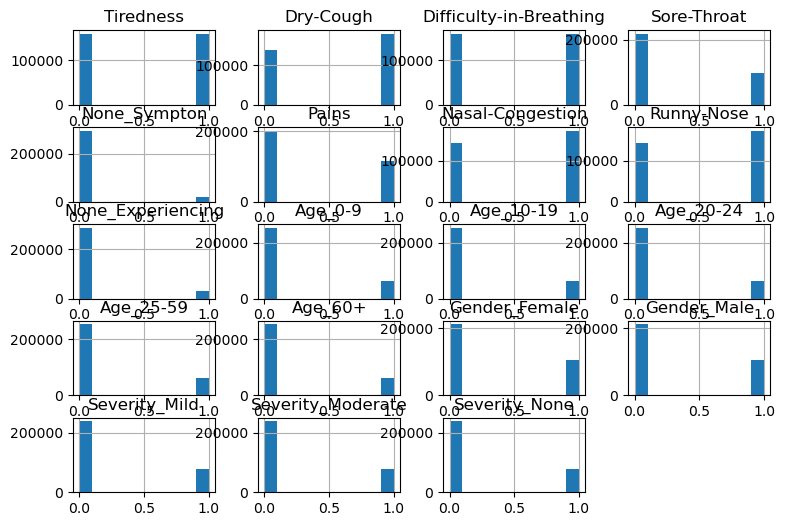

In [32]:
data.hist(figsize=(9,6))

In [33]:
x=data.iloc[:,:-1]
x.head(2)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0


In [34]:
y=data.iloc[:,-1:]
y.head(2)

,Severity_None
0,0
1,0


In [35]:
from sklearn.model_selection import train_test_split 
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=2)

In [36]:
xtrain. shape

(253440, 18)

In [37]:
ytrain. shape

(253440, 1)

In [38]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain, ytrain)

print('Training completed....')
print()

ypred=gauss_nb.predict(xtest)
print('Testing is done')

 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('='*60)
print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*60)
print()     
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('='*60)
print()     
print('Classification Report: \n',classification_report (ytest,ypred))
print('='*60)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training completed....

Testing is done
Accuracy Score:	
 0.7496527777777777


Confusion Matrix:
 [[31686 15862]
 [    0 15812]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80     47548
           1       0.50      1.00      0.67     15812

    accuracy                           0.75     63360
   macro avg       0.75      0.83      0.73     63360
weighted avg       0.88      0.75      0.77     63360

